# Analyzing extreme precipitation events in Saxony from 2002 to 2006

$\rightarrow$ This timeframe contains some of the heaviest rainfall recorded in Germany. 

In [1]:
library(dplyr)
library(stringr)
library(ggplot2)
library(tibble)
library(rdwd)
data(geoIndex)
library(data.table)
library(ggmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [2]:
# helper function to standardize column names
id_int_to_colname <- function(id) {
    if(id < 1) stop("ID not allowed")
    if(id < 10) return(paste0("SDO_0000", id)) 
    else if (id < 100) return(paste0("SDO_000", id)) 
    else if (id < 1000) return(paste0("SDO_00", id)) 
    else if (id < 10000) return(paste0("SDO_0", id)) 
    else if (id < 100000) return(paste0("SDO_", id)) 
} 

# Simple preprocessing of the data 

In [3]:
# load data and remove trailing column
rain_df <- read.csv("./data/precip_germany_2002_2006_clean.csv") %>% as_tibble()
rain_df <- rain_df %>% select(-X)

# create useful dataframes for geodata for maps later
names(rain_df)[2:ncol(rain_df)] <- sapply(names(rain_df)[2:ncol(rain_df)], function(x) str_replace(x, "X", "SDO_"))
mygeoIndex <- geoIndex[sapply(geoIndex$id, id_int_to_colname) %in% colnames(rain_df),]

In [4]:
# filter for saxony data
sachsen_geodat <- mygeoIndex %>% filter(state == "Sachsen")
sachsen_colnames <- sapply(sachsen_geodat$id, id_int_to_colname)
rain_df_sachsen <- rain_df %>% select(date, all_of(sachsen_colnames))

# filter for city specific data for Dresden by geographic specifications (lat and lon)
dresden_geodat <- sachsen_geodat %>% filter(lat < 51.6) %>% filter(lat > 50.5) %>% filter(lon < 14.4) %>% filter(lon > 13.3)
colnames <- sapply(dresden_geodat$id, id_int_to_colname)
rain_df_dresden <- rain_df[, c("date", colnames)]

# This is how the geodata looks like

In [30]:
head(dresden_geodat)

id,name,state,lat,lon,ele,nfiles,nonpublic,recentfile,display,col
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
4432,Altenberg-Schellerhau,Sachsen,50.7799,13.6814,778,6,0,TRUE,rdwd::metaInfo(id=4432)<br>name: Altenberg-Schellerhau<br>state: Sachsen<br>lat: 50.7799<br>lon: 13.6814<br>ele: 778<br>n public files: 6<br>nonpublic: 0<br>recentfile: TRUE,blue
457,Berthelsdorf,Sachsen,51.0571,14.2283,342,3,3,FALSE,rdwd::metaInfo(id=457)<br>name: Berthelsdorf<br>state: Sachsen<br>lat: 51.0571<br>lon: 14.2283<br>ele: 342<br>n public files: 3<br>nonpublic: 3<br>recentfile: FALSE,red
483,Bielatal,Sachsen,50.8732,14.0382,364,4,2,TRUE,rdwd::metaInfo(id=483)<br>name: Bielatal<br>state: Sachsen<br>lat: 50.8732<br>lon: 14.0382<br>ele: 364<br>n public files: 4<br>nonpublic: 2<br>recentfile: TRUE,blue
822,Burkau-Kleinhaenchen,Sachsen,51.2066,14.2371,205,6,0,TRUE,rdwd::metaInfo(id=822)<br>name: Burkau-Kleinhaenchen<br>state: Sachsen<br>lat: 51.2066<br>lon: 14.2371<br>ele: 205<br>n public files: 6<br>nonpublic: 0<br>recentfile: TRUE,blue
878,Coswig,Sachsen,51.1178,13.5731,110,6,0,TRUE,rdwd::metaInfo(id=878)<br>name: Coswig<br>state: Sachsen<br>lat: 51.1178<br>lon: 13.5731<br>ele: 110<br>n public files: 6<br>nonpublic: 0<br>recentfile: TRUE,blue
1048,Dresden-Klotzsche,Sachsen,51.1280,13.7543,227,93,1,TRUE,rdwd::metaInfo(id=1048)<br>name: Dresden-Klotzsche<br>state: Sachsen<br>lat: 51.1280<br>lon: 13.7543<br>ele: 227<br>n public files: 93<br>nonpublic: 1<br>recentfile: TRUE,blue
1051,Dresden-Strehlen,Sachsen,51.0248,13.7750,120,49,14,TRUE,rdwd::metaInfo(id=1051)<br>name: Dresden-Strehlen<br>state: Sachsen<br>lat: 51.0248<br>lon: 13.7750<br>ele: 120<br>n public files: 49<br>nonpublic: 14<br>recentfile: TRUE,blue
1651,Glashuette,Sachsen,50.8499,13.7629,368,3,3,FALSE,rdwd::metaInfo(id=1651)<br>name: Glashuette<br>state: Sachsen<br>lat: 50.8499<br>lon: 13.7629<br>ele: 368<br>n public files: 3<br>nonpublic: 3<br>recentfile: FALSE,red
2030,Hartha-Foerdergersdorf,Sachsen,50.9946,13.5439,335,3,3,FALSE,rdwd::metaInfo(id=2030)<br>name: Hartha-Foerdergersdorf<br>state: Sachsen<br>lat: 50.9946<br>lon: 13.5439<br>ele: 335<br>n public files: 3<br>nonpublic: 3<br>recentfile: FALSE,red


In [6]:
dresden_map <- get_stamenmap(bbox = c(left = 13.3, bottom = 50.55, right = 14.4, top = 51.4), maptype = "terrain", zoom = 12, messaging = F)

221 tiles needed, this may take a while (try a smaller zoom).

Source : http://tile.stamen.com/terrain/12/2199/1363.png

Source : http://tile.stamen.com/terrain/12/2200/1363.png

Source : http://tile.stamen.com/terrain/12/2201/1363.png

Source : http://tile.stamen.com/terrain/12/2202/1363.png

Source : http://tile.stamen.com/terrain/12/2203/1363.png

Source : http://tile.stamen.com/terrain/12/2204/1363.png

Source : http://tile.stamen.com/terrain/12/2205/1363.png

Source : http://tile.stamen.com/terrain/12/2206/1363.png

Source : http://tile.stamen.com/terrain/12/2207/1363.png

Source : http://tile.stamen.com/terrain/12/2208/1363.png

Source : http://tile.stamen.com/terrain/12/2209/1363.png

Source : http://tile.stamen.com/terrain/12/2210/1363.png

Source : http://tile.stamen.com/terrain/12/2211/1363.png

Source : http://tile.stamen.com/terrain/12/2199/1364.png

Source : http://tile.stamen.com/terrain/12/2200/1364.png

Source : http://tile.stamen.com/terrain/12/2201/1364.png

Source : 

Source : http://tile.stamen.com/terrain/12/2210/1373.png

Source : http://tile.stamen.com/terrain/12/2211/1373.png

Source : http://tile.stamen.com/terrain/12/2199/1374.png

Source : http://tile.stamen.com/terrain/12/2200/1374.png

Source : http://tile.stamen.com/terrain/12/2201/1374.png

Source : http://tile.stamen.com/terrain/12/2202/1374.png

Source : http://tile.stamen.com/terrain/12/2203/1374.png

Source : http://tile.stamen.com/terrain/12/2204/1374.png

Source : http://tile.stamen.com/terrain/12/2205/1374.png

Source : http://tile.stamen.com/terrain/12/2206/1374.png

Source : http://tile.stamen.com/terrain/12/2207/1374.png

Source : http://tile.stamen.com/terrain/12/2208/1374.png

Source : http://tile.stamen.com/terrain/12/2209/1374.png

Source : http://tile.stamen.com/terrain/12/2210/1374.png

Source : http://tile.stamen.com/terrain/12/2211/1374.png

Source : http://tile.stamen.com/terrain/12/2199/1375.png

Source : http://tile.stamen.com/terrain/12/2200/1375.png

Source : http:

# Last data preparation, drop columns with non relevant data

In [7]:
# AN ALTERNATIVE DATA PROCESSING BY JUST TRANSFORMING EXTREME EVENTS W.R.T AN EXCEEDANCE
# daily_total_precip <- rain_df_dresden %>% select(- date) %>% rowSums
# print(quantile(daily_total_precip, 0.8))
# rain_df_dresden_extreme <- rain_df_dresden[which(daily_total_precip > 80.5), ]

data_pca <- rain_df_dresden %>% select(-date)

# An example useage of the package

In [8]:
library(maxstablePCA)

# transform data in analogy to K-means, b ut so far its using the 1 norm instead of euclidean 
data_pca_f1 <- transform_unitfrechet(data_pca)

# fit a max stable PCA with p = 5 as latent encoding
# the standard threshold for the estimation of the STD is s = 3, 
# corresponding roughly to the top ~30% of extreme data.
maxPCA <- max_stable_prcomp(data_pca_f1, 5, n_initial_guesses = 300)

# view some basic summaries
summary(maxPCA)

 num [1:225, 1:250] 0.285 0.702 1.119 0.547 0.173 ...
NULL
[1] 225 250


For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



$p
[1] 5

$d
[1] 25

$decoder_matrix
              [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] 1.068780e-02 1.893516e-02 0.0044173630 0.0321569068 0.5344072497
 [2,] 3.395754e-04 1.754336e-01 0.3910721994 0.0001173684 0.0003861909
 [3,] 3.990111e-04 1.143825e+00 0.0027395572 0.0103854728 0.0048722788
 [4,] 3.007899e-03 5.292131e-04 0.6221656848 0.0050803678 0.0003849844
 [5,] 3.743027e-03 2.178051e-02 0.1620655766 0.3782191826 0.0004903154
 [6,] 3.345462e-04 1.016827e-02 0.0055975267 0.3782111232 0.0328218221
 [7,] 1.181869e+00 8.959770e-03 0.0045699888 0.0004434654 0.0002146720
 [8,] 7.449986e-01 1.176725e-03 0.0100348108 0.0003339523 0.0331842580
 [9,] 2.319120e-03 9.088948e-03 0.1418408291 0.3629569940 0.0005380221
[10,] 3.487335e-04 2.451067e-02 0.8136073103 0.0043926424 0.0016952966
[11,] 1.103014e-03 7.613905e-01 0.0005420605 0.0028243377 0.2435595990
[12,] 3.569153e-03 2.799455e-01 0.0004371403 0.0005846685 0.2032821136
[13,] 2.689676e-01 1.474829e-02 0.001661

In [28]:
write.csv(maxPCA$reconstr_matrix, file = "./reconstr_matrix_new_initial_values.csv")

# The encoder matrix can be understood as the loadings

In [10]:
maxPCA$encoder_matrix

0.0004997291,0.003534287,0.0046043864,0.0005600372,0.0268401215,0.0001776244,0.8461137687,0.337855093,0.0619570150,0.023011805,⋯,0.0023070011,0.17582117,0.0367271941,0.0628382228,0.0165935911,0.0004755498,0.014065678,0.001420915,0.0009551290,9.391583e-05
0.0031621011,0.001854094,0.8742589984,0.0027377534,0.0053680231,0.0002061477,0.0002322379,0.013486321,0.0124672456,0.019087446,⋯,0.0005770032,0.01944315,0.0044066193,0.0070139359,0.0060301336,0.0006891638,0.000639115,0.020651025,0.0009258501,6.529820e-04
0.0284199234,0.278382110,0.0100367439,0.4348765259,0.0329095056,0.0154908903,0.0005993668,0.003559028,0.0005770695,1.229093108,⋯,0.0019527283,0.02859978,0.0043889263,0.0205586855,0.0148162809,0.0201513847,0.020508602,0.113997944,0.0143967036,1.334810e-02
0.0075193301,0.370901616,0.0056617886,0.0689353546,0.0174460538,0.1038949735,0.0518582663,0.011886517,0.0323929782,0.001623797,⋯,0.0066334709,0.17841440,0.0006142126,0.0007373031,0.0006268708,0.0015888279,0.097595165,1.410334870,0.1801633665,3.245433e-02
0.2715931513,0.059208722,0.0005066639,0.0436588278,0.0004640369,0.0390568134,0.0322471191,0.056701427,0.0217410103,0.009673198,⋯,0.0089244627,0.03445814,0.0121383588,0.0006835307,0.0008287124,0.0114912970,0.003732232,0.006827275,0.0389188355,1.179678e+00


# create the compact representation and reconstrcution 

This is done with a functions simpliar to *predict(model, data, ...)* which are called *compress(model, data)* and *reconstruct(model, compressed_data)*. 

In [11]:
compr <- compress(maxPCA, data_pca_f1)
reconstr <- reconstruct(maxPCA, compr)

# Look at the data vs. the reconstructed data.

In [12]:
head(reconstr)

3.7850825,1.0708580,5.133927,1.703652,0.9356835,0.9356636,2.288773,1.4427428,0.8979261,2.227870,⋯,1.7636252,3.6617805,1.3078488,1.119680,1.2846878,2.4542171,2.3366067,1.754135,1.1651259,6.003997
0.8288833,0.7819934,1.469240,1.244091,0.9356835,0.9356636,1.534156,0.9670652,0.8979261,1.626900,⋯,0.5047186,0.8018818,0.8766463,1.119680,0.7846386,0.5374413,0.6686959,1.754135,0.7809796,1.314796
0.8288833,0.7819934,1.351910,1.244091,0.9356835,0.9356636,1.534156,0.9670652,0.8979261,1.626900,⋯,0.4644130,0.8018818,0.8766463,1.119680,0.7846386,0.5374413,0.6152955,1.754135,0.7809796,1.314796
0.8288833,0.7819934,1.351910,1.244091,0.9356835,0.9356636,1.534156,0.9670652,0.8979261,1.626900,⋯,0.4644130,0.8018818,0.8766463,1.119680,0.7846386,0.5374413,0.6152955,1.754135,0.7809796,1.314796
2.1382718,2.7671882,10.227136,4.402383,2.5957974,2.5957421,4.608315,2.9048809,2.4910498,5.757005,⋯,3.5132625,2.0686159,2.6332795,3.106245,2.5591862,1.4676380,4.6546810,4.866366,2.3459150,3.391782
0.8288833,1.2082357,2.850451,1.922210,1.3574952,1.3574663,2.560749,1.6141845,1.3027166,2.513678,⋯,0.9791972,1.1299037,1.4632610,1.624439,1.1383584,0.8155372,1.2973271,2.544909,1.3035783,1.314796


In [13]:
head(data_pca_f1)

SDO_04432,SDO_00457,SDO_00483,SDO_00822,SDO_00878,SDO_01048,SDO_01051,SDO_01651,SDO_02030,SDO_03094,⋯,SDO_02985,SDO_03683,SDO_15819,SDO_04023,SDO_04047,SDO_02317,SDO_04895,SDO_02622,SDO_05746,SDO_05779
3.940980,2.194188,5.133933,1.812126,2.448080,2.210930,2.288783,4.135481,4.135481,2.227872,⋯,6.533582,4.123577,3.408778,3.522940,2.653662,2.875933,1.616224,1.754136,2.404247,6.003984
1.265307,1.462255,1.469242,1.640387,1.975231,1.713091,1.534163,1.651288,1.526762,1.626902,⋯,1.559185,1.187115,1.632277,1.571903,1.514534,1.559185,1.616224,1.754136,1.651288,1.314793
1.076778,1.462255,1.351912,1.640387,1.975231,1.713091,1.534163,1.651288,1.526762,1.626902,⋯,1.559185,1.187115,1.632277,1.571903,1.514534,1.559185,1.616224,1.754136,1.651288,1.314793
1.076778,1.462255,1.351912,1.640387,1.975231,1.713091,1.534163,1.651288,1.526762,1.626902,⋯,1.559185,1.187115,1.632277,1.571903,1.514534,1.559185,1.616224,1.754136,1.651288,1.314793
6.245923,4.426992,10.227147,4.053397,4.850479,3.813087,4.608335,6.533582,6.758591,5.757010,⋯,4.726635,4.308719,7.636412,4.076556,6.098661,5.957650,5.609313,4.866369,4.308719,3.391775
1.943690,1.892758,2.850454,2.044385,2.609277,1.961120,2.560760,2.059409,2.418719,2.513680,⋯,1.892758,1.882808,2.687761,2.457993,2.443147,2.074599,2.869528,2.544911,1.968157,1.314793


# Looking at the whole dataset with the real extreme event 

In [14]:
dat_pca <- as_tibble(data_pca_f1)
dat_reconstr <- as_tibble(reconstr)
names(dat_reconstr) <- names(dat_pca)

Warning message:
“`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session.”


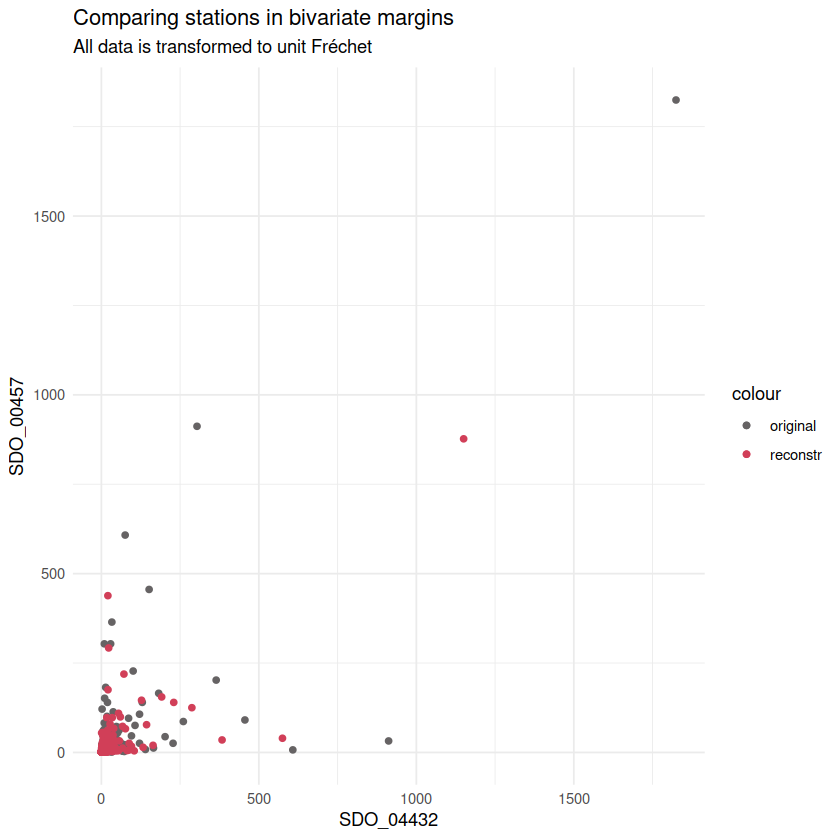

In [15]:
p1 <- ggplot(dat_pca, aes(x = SDO_04432, y = SDO_00457, color = "original")) +
geom_point() +
geom_point(aes(x = SDO_04432, y = SDO_00457, color = "reconstr"), data = dat_reconstr) +
scale_color_manual(values = c("#666364", "#D13F58")) + 
labs(title = "Comparing stations in bivariate margins", subtitle = "All data is transformed to unit Fréchet") +
theme_minimal()

p1

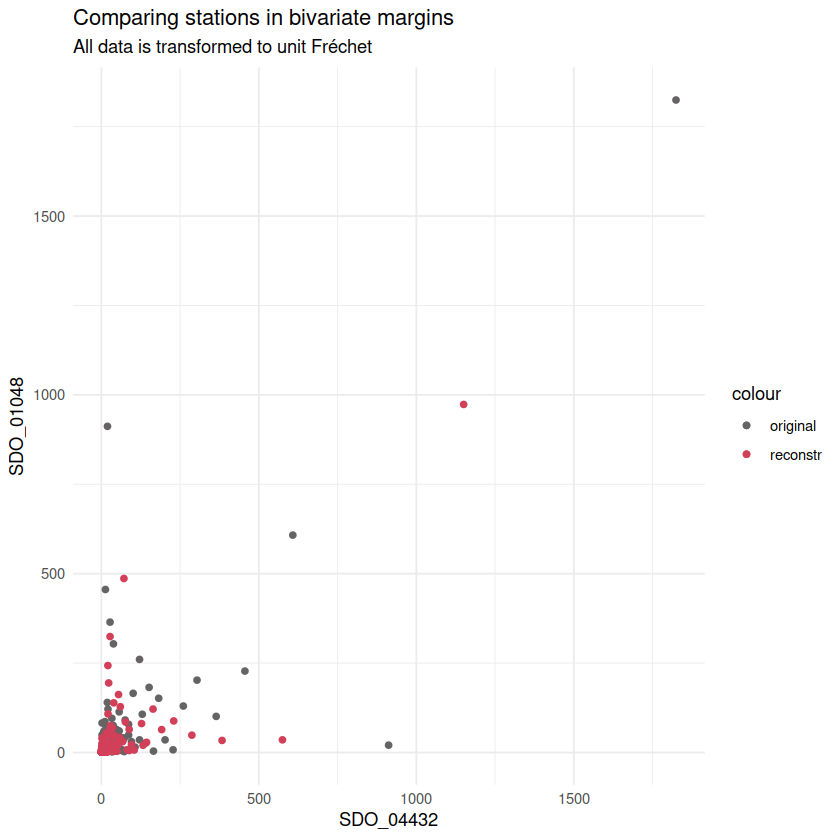

In [16]:
p2 <- ggplot(dat_pca, aes(x = SDO_04432, y = SDO_01048, color = "original")) +
geom_point() +
geom_point(aes(x = SDO_04432, y = SDO_01048, color = "reconstr"), data = dat_reconstr) +
scale_color_manual(values = c("#666364", "#D13F58")) + 
labs(title = "Comparing stations in bivariate margins", subtitle = "All data is transformed to unit Fréchet") +
theme_minimal()

p2

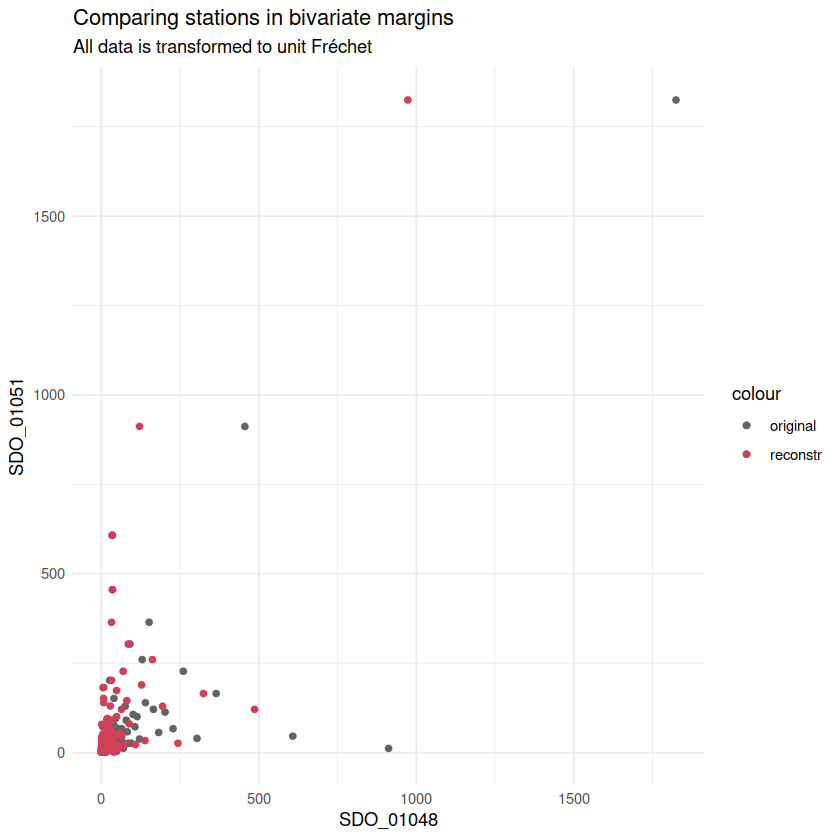

In [17]:
p3 <- ggplot(dat_pca, aes(x = SDO_01048, y = SDO_01051, color = "original")) +
geom_point() +
geom_point(aes(x = SDO_01048, y = SDO_01051, color = "reconstr"), data = dat_reconstr) +
scale_color_manual(values = c("#666364", "#D13F58")) + 
labs(title = "Comparing stations in bivariate margins",
     subtitle = "All data is transformed to unit Fréchet") +
theme_minimal()

p3

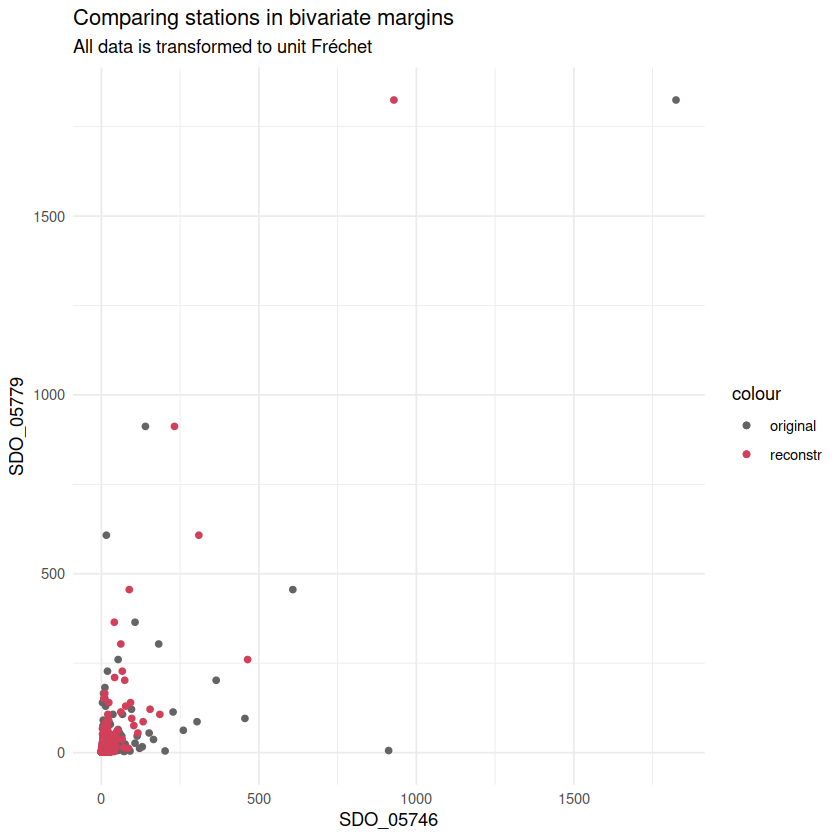

In [18]:
p4 <- ggplot(dat_pca, aes(x = SDO_05746, y = SDO_05779, color = "original")) +
geom_point() +
geom_point(aes(x = SDO_05746, y = SDO_05779, color = "reconstr"), data = dat_reconstr) +
scale_color_manual(values = c("#666364", "#D13F58")) + 
labs(title = "Comparing stations in bivariate margins",
     subtitle = "All data is transformed to unit Fréchet") +
theme_minimal()

p4

In [19]:
library(gridExtra)

dat_reconstr$date <- rain_df_dresden$date
dat_pca$date <- rain_df_dresden$date


create_map_by_day <- function(dateinput) {
    
    internal_geodat_orig <- dresden_geodat
    internal_geodat_rec <- dresden_geodat
    
    internal_geodat_orig$value <- 0
    internal_geodat_rec$value <- 0
    
    for(i in 1:dim(dresden_geodat)[1]) {
        internal_geodat_orig$value[i] <- unlist((dat_pca %>% filter(date == dateinput))[, id_int_to_colname(internal_geodat_orig$id[i])])
        internal_geodat_rec$value[i] <- unlist((dat_reconstr %>% filter(date == dateinput))[, id_int_to_colname(internal_geodat_rec$id[i])])
    }
     

    
    map_orig <- ggmap(dresden_map) +
    geom_point(internal_geodat_orig, mapping = aes(x = lon, y = lat, size = 2.5, color = value)) + 
    scale_color_gradient2(low = "#100000", mid = "#666364", high = "#D13F58", midpoint = 30) + 
    labs(title = paste("Original data", dateinput), 
     subtitle = "All data is transformed to unit Fréchet") +
    theme_minimal()
    
    map_rec <- ggmap(dresden_map) +
    geom_point(internal_geodat_rec, mapping = aes(x = lon, y = lat, size = 2.5, color = value)) + 
    scale_color_gradient2(low = "#100000", mid = "#666364", high = "#D13F58", midpoint = 30) + 
    labs(title = paste("Reconstructed data", dateinput), 
     subtitle = "All data is transformed to unit Fréchet") +
    theme_minimal()
    
    return(grid.arrange(map_orig, map_rec, ncol = 2))
}


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Looking at the map plots

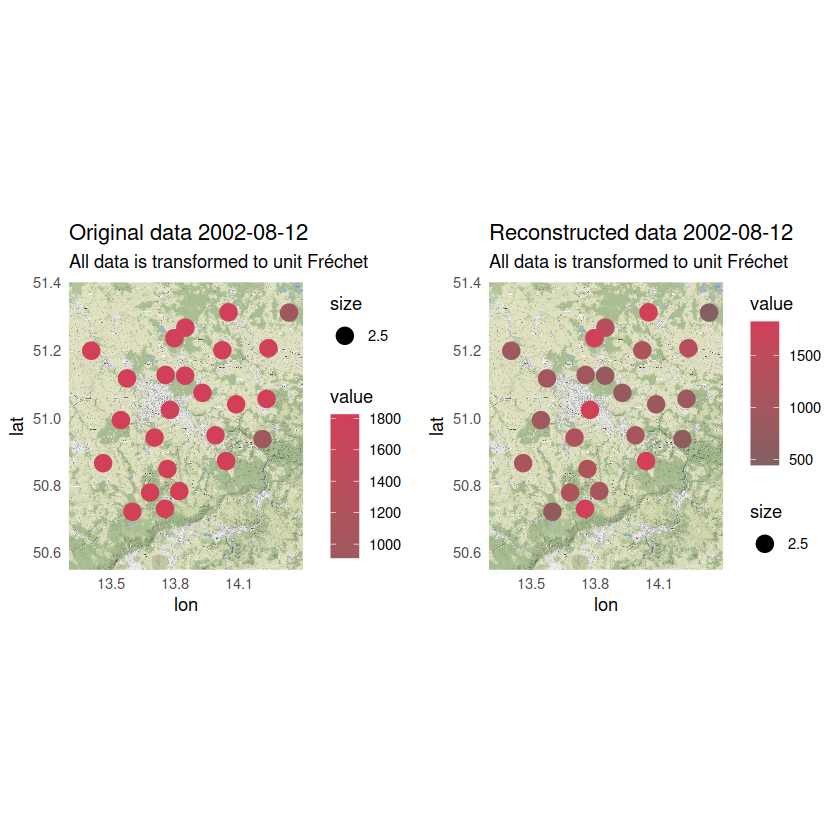

In [20]:
m1 <- create_map_by_day("2002-08-12")

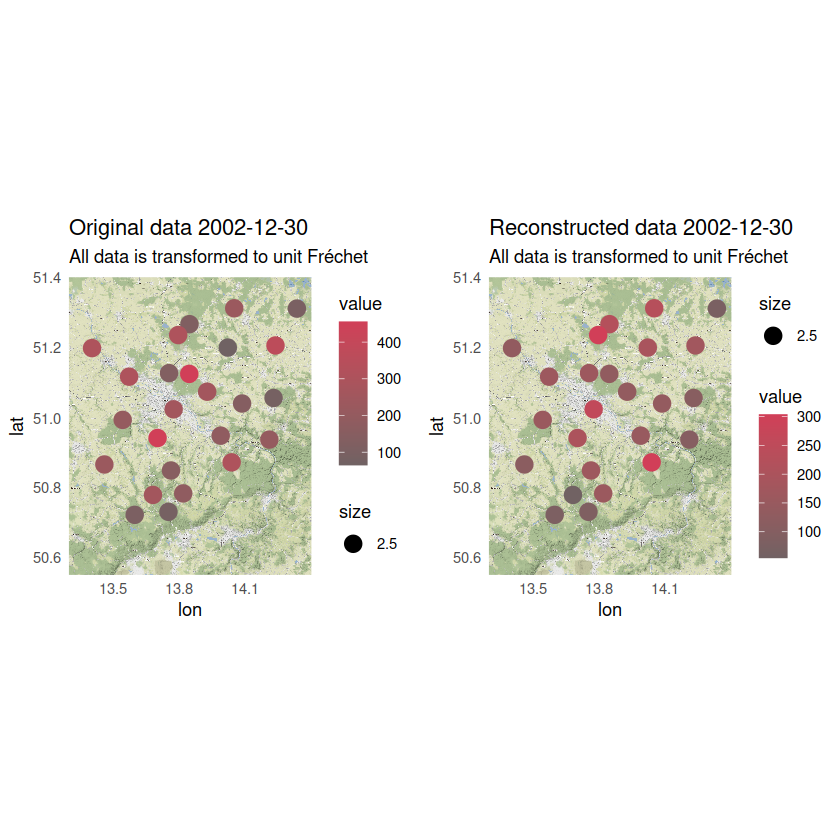

In [21]:
m2 <- create_map_by_day("2002-12-30")

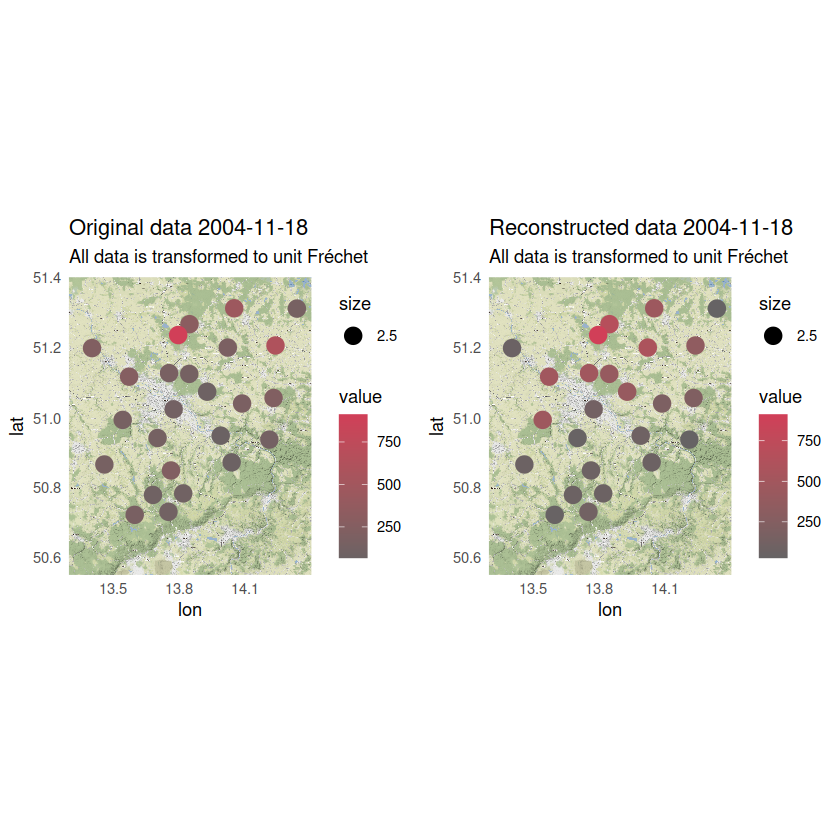

In [22]:
m3 <- create_map_by_day("2004-11-18")

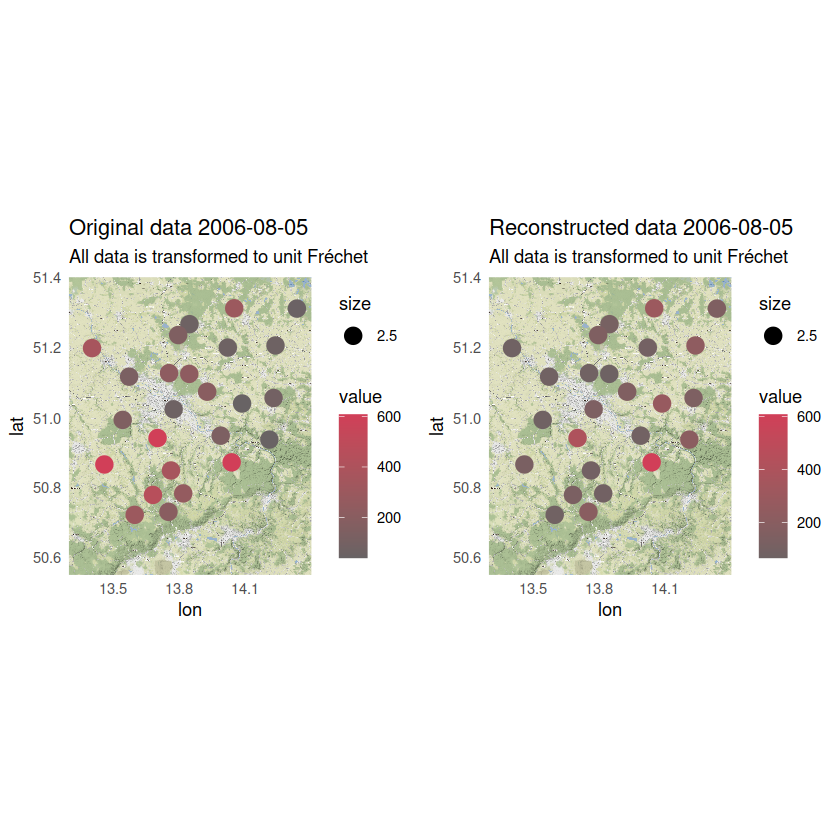

In [23]:
m4 <- create_map_by_day("2006-08-05")

In [24]:
dat_pca$date <- as.POSIXct.default(dat_pca$date)
dat_reconstr$date <- as.POSIXct.default(dat_reconstr$date)


t1 <- ggplot(aes(x = date, y = SDO_01051, color = "SDO_01051"), data = dat_pca) +
geom_line() + 
geom_line(aes(x = date, y = SDO_01051, color = "reconstruction"), data = dat_reconstr) + 
scale_color_manual(values = c("#D13F58","#666364")) + 
labs(title = "temporal view on reconstruction") + 
theme_minimal()

t2 <- ggplot(aes(x = date, y = SDO_01651, color = "SDO_01651"), data = dat_pca) +
geom_line() + 
geom_line(aes(x = date, y = SDO_01651, color = "reconstruction"), data = dat_reconstr) + 
scale_color_manual(values = c("#D13F58","#666364")) + 
labs(title = "temporal view on reconstruction") + 
theme_minimal()

# Looking at specific stations to see if the temporal fit looks reasonable

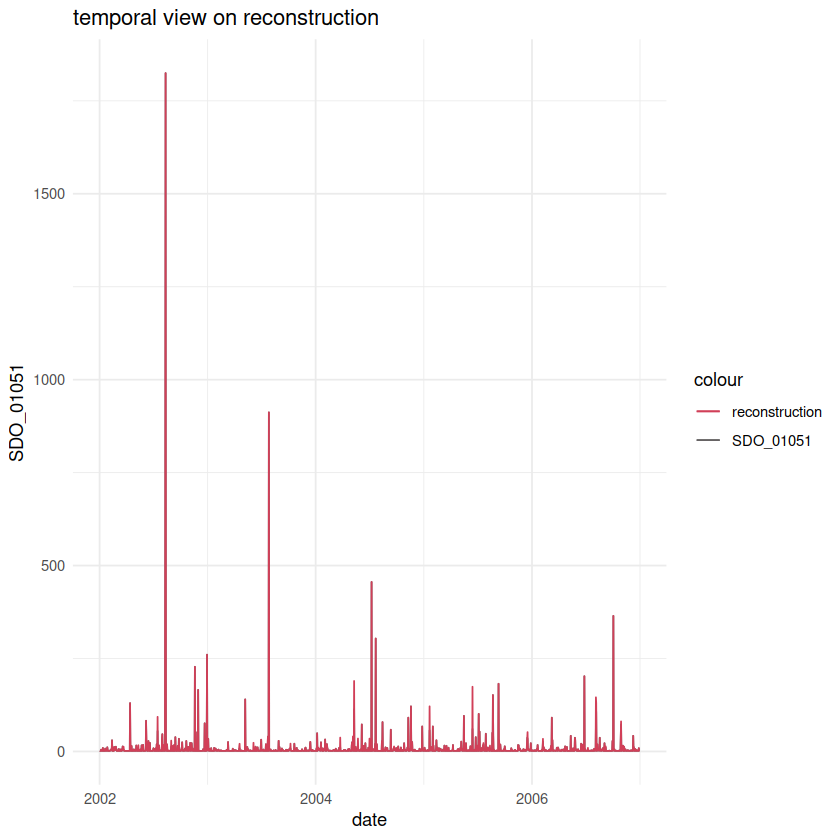

In [25]:
t1

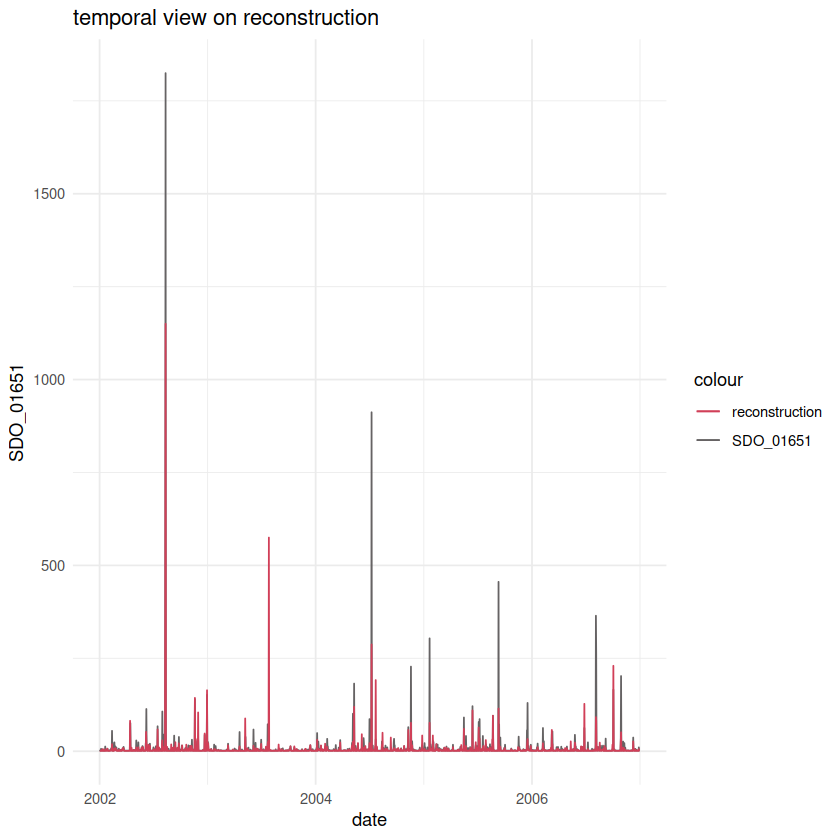

In [26]:
t2

In [27]:
reconstr_orig_margins <- transform_orig_margins(reconstr, data_pca)